# 1-2) 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

##  step1 탐색 : 데이터의 기초 정보 살펴보기

#### - chipotle 데이터셋의 기초 정보 출력하기

In [1]:
# -*- coding : utf-8 -*-

import pandas as pd

file_path = '..\data\chipotle.tsv'
# read.csv() 함수로 데이터를 데이터 프레임 형태로 불러오기
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
# shape : 데이터의 행과 열의 크기를 반환.
print('-----------------------------')
print(chipo.info())
# info() : 데이터의 행과 열의 속성을 나타냄.


(4622, 5)
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


1. chipo.shape 결과로 chipotle 데이터는 4622개의 행과 5개의 열(피처)로 구성되어 있음을 알 수 있다  
2. chipo.info() 결과를 보면 order_id, quantity는 데이터 타입이 int, 나머지는 object로 구성되어 있다
3. choice_description을 보면 3376 non-null 이므로 1246개의 null 값이 있다.

#### - chipotle 데이터셋의 행과 열, 데이터 확인하기

In [6]:
# head를 이용하여 순서대로 10개의 데이터를 확인하기

chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
print(chipo.columns)
print('-----------------------')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-----------------------
RangeIndex(start=0, stop=4622, step=1)


chipotle 데이터셋 피처의 의미  
order_id : 주문번호  
quantity : 아이템의 주문 수량  
item_name : 주문한 아이템의 이름  
choice_description : 주문한 아이템의 상세 선택 옵션  
item_price : 주문 아이템의 가격정보  

### quantity와 item_price의 수치적 특징

: 연속형 피처

####  - describe() 함수로 기초 통계량 출력하기

In [9]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str로 변환.

chipo['order_id'] = chipo['order_id'].astype(str)

print(chipo.describe())
# chipo 데이터에서 수치형 피처들의 기초 통계량을 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


chipo 데이터셋에서 수치형 자료는 quantity 뿐이므로 quantity에 대한 정보만 출력

위 결과에서 평균값(mean) : 1.0757 이므로 대부분 한가지 아이템에 대해서 1개 정도만 주문했다는 것을 알 수 있음  
-> 한 사람이 같은 메뉴를 여러 개 주문하는 경우는 많지 않다는 사실을 알 수 있다.

### order_id와 item_name의 개수

: order_id, item_name은 범주형 피처이므로 unique() 함수를 이용

#### - unique() 함수로 범주형 피처의 개수 출력하기

In [10]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력

1834
50


## step2 인사이트의 발견 : 탐색과 시각화하기

### 가장 많이 주문한 아이템 TOP10

: DataFrame['columns']의 형태에 value_counts()함수를 적용하는 방식 사용

#### 가장 많이 주문한 아이템 TOP10 출력하기

In [11]:
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print('TOP ', idx, ' : ', val, cnt)

TOP  1  :  Chicken Bowl 726
TOP  2  :  Chicken Burrito 553
TOP  3  :  Chips and Guacamole 479
TOP  4  :  Steak Burrito 368
TOP  5  :  Canned Soft Drink 301
TOP  6  :  Chips 211
TOP  7  :  Steak Bowl 211
TOP  8  :  Bottled Water 162
TOP  9  :  Chicken Soft Tacos 115
TOP  10  :  Chicken Salad Bowl 110


### 아이템별 주문 개수와 총량

#### - 아이템별 주문 개수와 총량 구하기

In [13]:
# 아이템별 주문 개수와 총량 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [14]:
# 아이템별 주문 총량을 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화

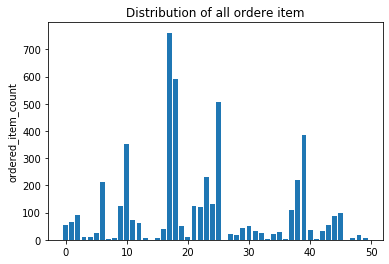

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordere item')

plt.show()

## step3 데이터 전처리 : 전처리 함수 사용하기

item_price : 문자열 데이터  
문자열 데이터를 전처리하는 방법에 대해 알아보기

#### - item_price 피처 살펴보기

In [19]:
print(chipo.info())
print('----------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

위의 결과를 보고 가격을 나타내는 숫자 앞에 $기호가 붙어 있는 것을 발견할 수 있다.    
-> $기호를 제거하는 전처리 과정이 필요

#### - apply()와 lambda를 이용해 데이터 전처리하기

In [21]:
# column 단위 데이터에 apply() 함수로 전처리를 작용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


## step4 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

### 주문당 평균 계산금액 출력하기

In [24]:
# 주문당 평균 계산 금액 출력하기
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

### 한 주문에 10달려 이상 지불한 주문 번호(order_id) 출력하기

In [ ]:
# 한 주문에 10달려 이상 지불한 주문 번호 출력하기
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

### 각 아이템의 가격 구하기

In [30]:
# 각 아이템의 가격 구하기

chipo_one_item = chipo[chipo.quantity == 1]
# 통일 아이템을 1개만 구매한 주문을 선별

price_per_item = chipo_one_item.groupby('item_name').min()
# 아이템의 이름을 기준으로 그훕화 후 min함수로 각 그룹별 최저가를 계산

price_per_item.sort_values(by = 'item_price', ascending = False)[:10]
# 아이템 가격을 기준으로 정렬

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


각 아이템의 대략적인 가격을 2개의 그래프로 시각화

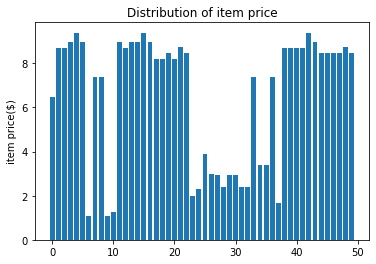

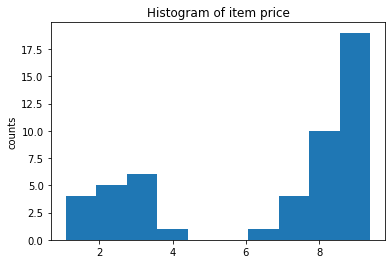

In [32]:
# 아이템가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [33]:
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [35]:
# Veggie Salad Bowl이 몇 번 주문되었는지를 계산
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']

# 한 주문 내에서 중복 집계된 item_name을 제거
chipo_sald = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [40]:
# chicken bowl 2개 이상 주문한 주문 횟수를 구하기
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])
chipo_chicken_result.head()

33
(33, 5)


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50


### 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴의 총 주문 수량을 구하기

In [42]:
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64